<a href="https://colab.research.google.com/github/KolipakaRamesh/AIML_Practice_Excercises/blob/main/Week5_Day3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5, Day 3: Convolutional Neural Networks

## Learning Objectives
- Understand CNN architecture and components
- Learn about convolution and pooling operations
- Master CNN implementation techniques
- Practice building CNNs for image tasks

## Topics Covered
1. CNN Fundamentals
2. Convolution Operations
3. Pooling Layers
4. CNN Architectures

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical

## 1. CNN Fundamentals

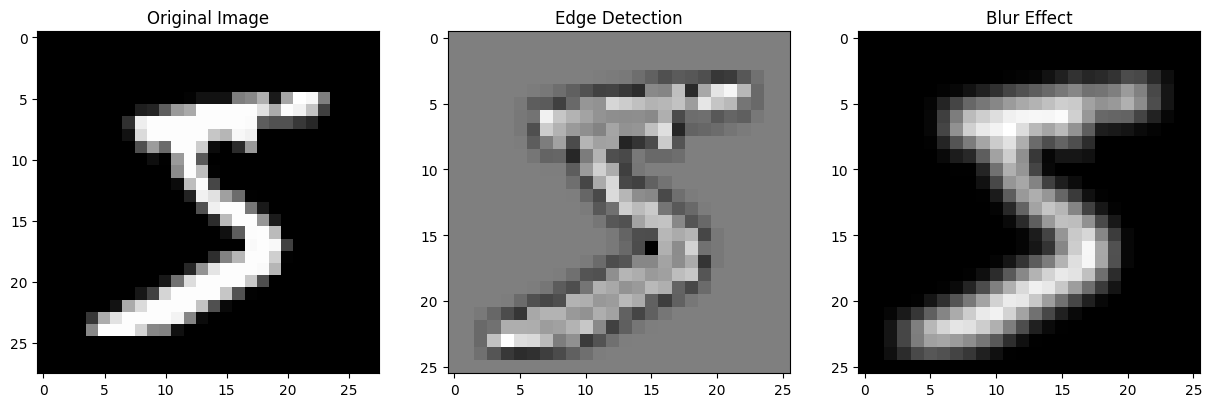

In [6]:
def visualize_convolution():
    # Load and preprocess sample image
    (X_train, _), (_, _) = mnist.load_data()
    sample_image = X_train[0]

    # Define simple filters
    edge_filter = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ])

    blur_filter = np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ])

    # Apply convolution manually
    def apply_filter(image, kernel):
        output = np.zeros((image.shape[0]-2, image.shape[1]-2))
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                output[i, j] = np.sum(image[i:i+3, j:j+3] * kernel)
        return output

    edge_output = apply_filter(sample_image, edge_filter)
    blur_output = apply_filter(sample_image, blur_filter)

    # Visualize results
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(sample_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(edge_output, cmap='gray')
    plt.title('Edge Detection')

    plt.subplot(133)
    plt.imshow(blur_output, cmap='gray')
    plt.title('Blur Effect')

    plt.show()

visualize_convolution()

## 2. Building a Simple CNN

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.8778 - loss: 0.4145 - val_accuracy: 0.9827 - val_loss: 0.0571
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9837 - loss: 0.0543 - val_accuracy: 0.9849 - val_loss: 0.0475
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9894 - loss: 0.0351 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9914 - loss: 0.0260 - val_accuracy: 0.9886 - val_loss: 0.0324
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9896 - val_loss: 0.0292


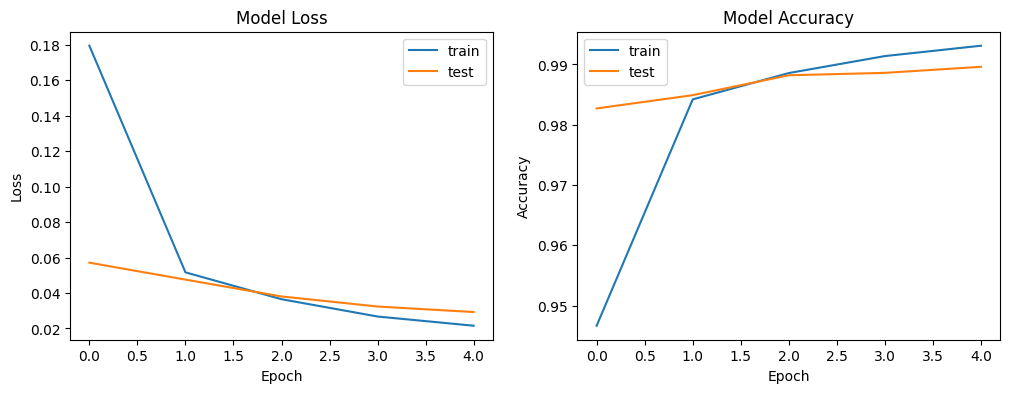

In [4]:
def simple_cnn():
    # Load and preprocess MNIST data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape and normalize data
    X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
    X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

    # Convert labels to categorical
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Create model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=5,
                       batch_size=64)

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    return model

global model
model = simple_cnn()

## 3. Feature Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


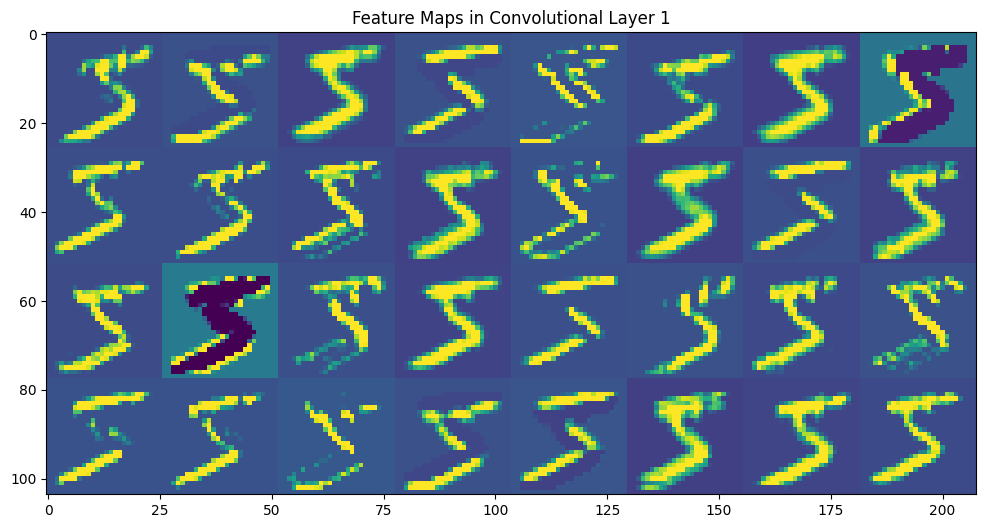

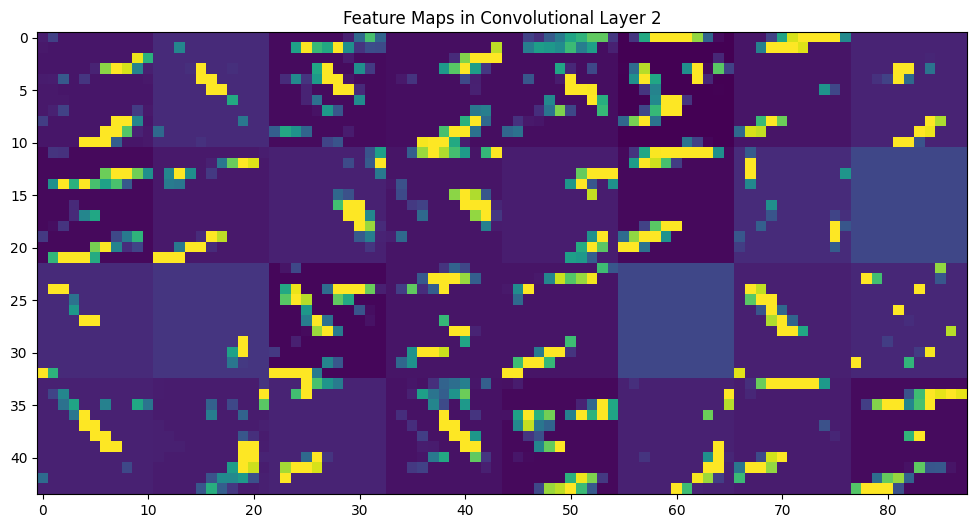

In [8]:
def visualize_features(model):
    # Get sample image
    (X_train, _), (_, _) = mnist.load_data()
    image = X_train[0].reshape(1, 28, 28, 1) / 255.0

    # Call the model once to build it before accessing inputs
    # This is a workaround for the issue where the model has not been called before
    # and thus doesn't have a defined input attribute.
    # The original line: model.predict(image)
    # can cause resource exhaustion errors if called multiple times in a notebook
    # Instead of using predict, you can simply call the model with the input
    # to build it:
    model(image)

    # Create model to output feature maps
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    feature_model = tf.keras.Model(inputs=model.layers[0].input, outputs=layer_outputs)

    # Get feature maps
    feature_maps = feature_model.predict(image)

    # Plot feature maps
    for layer_idx, feature_map in enumerate(feature_maps):
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size * 4, size * 8))

        for i in range(4):
            for j in range(8):
                if i * 8 + j < n_features:
                    feature = feature_map[0, :, :, i * 8 + j]
                    feature -= feature.mean()
                    feature /= feature.std() + 1e-5
                    feature *= 64
                    feature += 128
                    feature = np.clip(feature, 0, 255).astype('uint8')
                    display_grid[i * size : (i + 1) * size,
                                j * size : (j + 1) * size] = feature

        plt.figure(figsize=(12, 6))
        plt.title(f'Feature Maps in Convolutional Layer {layer_idx + 1}')
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
visualize_features(model)

## Practical Exercises

In [ ]:
# Exercise 1: CIFAR-10 Classification

def cifar10_exercise():
    # Load CIFAR-10 dataset
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Display sample images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_train[i])
        plt.axis('off')
    plt.show()

    print("Task: Build a CNN for CIFAR-10")
    print("1. Preprocess the data")
    print("2. Design CNN architecture")
    print("3. Train the model")
    print("4. Evaluate performance")

    # Your code here

cifar10_exercise()

In [ ]:
# Exercise 2: Transfer Learning

def transfer_learning_exercise():
    # Load pre-trained model
    base_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    print("Task: Use transfer learning")
    print("1. Freeze base model layers")
    print("2. Add custom layers")
    print("3. Fine-tune the model")
    print("4. Compare with training from scratch")

    # Your code here

transfer_learning_exercise()

## MCQ Quiz

1. What is the purpose of convolution layers?
   - a) Data normalization
   - b) Feature extraction
   - c) Dimensionality reduction
   - d) Classification

2. What does pooling do?
   - a) Feature extraction
   - b) Dimensionality reduction
   - c) Classification
   - d) Normalization

3. Which is NOT a type of pooling?
   - a) Max pooling
   - b) Average pooling
   - c) Minimum pooling
   - d) Convolution pooling

4. What is a filter in CNN?
   - a) Activation function
   - b) Weight matrix
   - c) Loss function
   - d) Learning rate

5. Why use padding in CNNs?
   - a) Increase accuracy
   - b) Preserve spatial dimensions
   - c) Speed up training
   - d) Reduce parameters

6. What is stride in convolution?
   - a) Filter size
   - b) Step size
   - c) Padding amount
   - d) Output size

7. Which CNN architecture came first?
   - a) ResNet
   - b) VGG
   - c) LeNet
   - d) AlexNet

8. What is the benefit of deeper CNNs?
   - a) Faster training
   - b) Less parameters
   - c) Hierarchical features
   - d) Simple implementation

9. What problem do skip connections solve?
   - a) Overfitting
   - b) Vanishing gradients
   - c) Slow training
   - d) High memory usage

10. When should you use transfer learning?
    - a) Small dataset
    - b) Similar task
    - c) Limited compute
    - d) All of the above

Answers: 1-b, 2-b, 3-d, 4-b, 5-b, 6-b, 7-c, 8-c, 9-b, 10-d